# **Black Friday Sales: Analysis and Prediction**

In [1]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

2. data analysis

In [2]:
train = pd.read_csv('/content/drive/MyDrive/20191IST0041/train.csv')

train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
train.shape

(550068, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


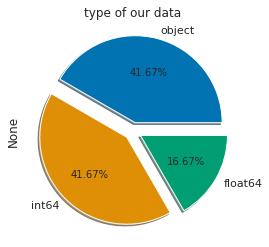

In [5]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data');

In [6]:
# show the numirical values

num_columns = [f for f in train.columns if train.dtypes[f] != 'object']
num_columns.remove('Purchase')
num_columns.remove('User_ID')
num_columns

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [7]:
# show the categorical values

cat_columns = [f for f in train.columns if train.dtypes[f] == 'object']
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [8]:
train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


A basic observation is that:

Product P00265242 is the most popular product.
* Most of the transactions were made by men.
* Age group with most transactions was 26-35.
* City Category with most transactions was B

finding missing values

In [9]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


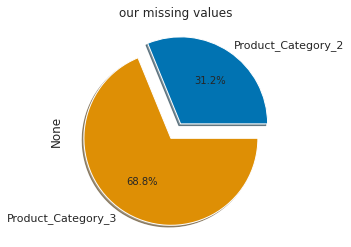

In [10]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('our missing values');

Only Product_Category_2 and Product_Category_3 have null values which is good news. However Product_Category_3 is null for nearly 70% of transactions so it can't give us much information. so we gonna drop Product_Category_3

Product_Category_2

In [11]:
train.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [12]:
train.Product_Category_2.describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [13]:
# Replace using median 
median = train['Product_Category_2'].median()
train['Product_Category_2'].fillna(median, inplace=True)

Product_Category_3

In [14]:
train.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [15]:
# drop Product_Category_3 
train=train.drop('Product_Category_3',axis=1)

In [16]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


# **3. data visualization**

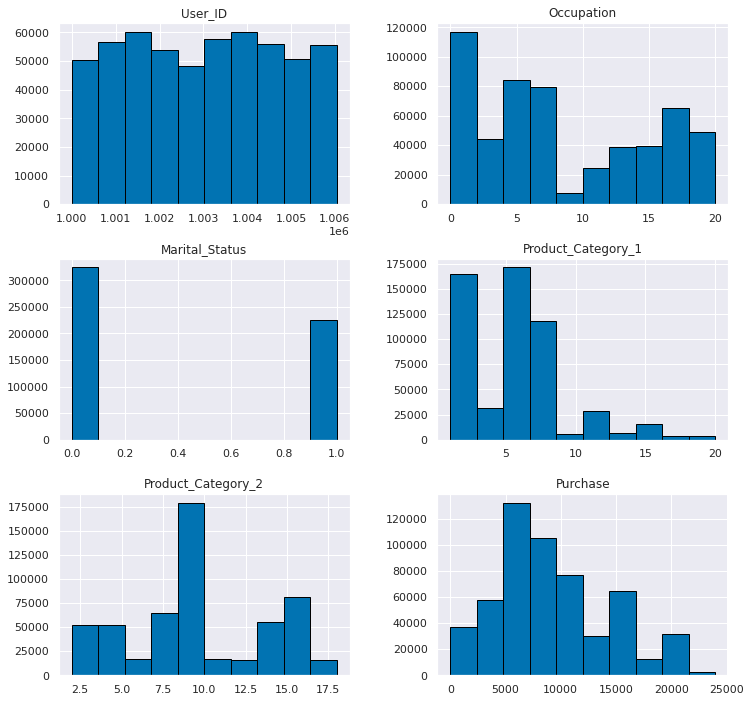

In [17]:
train.hist(edgecolor='black',figsize=(12,12));

In [18]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

A) Gender

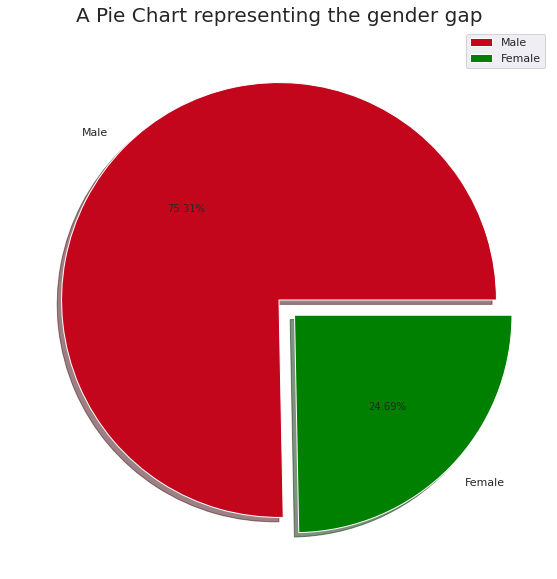

In [19]:
# pie chart 

size = train['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

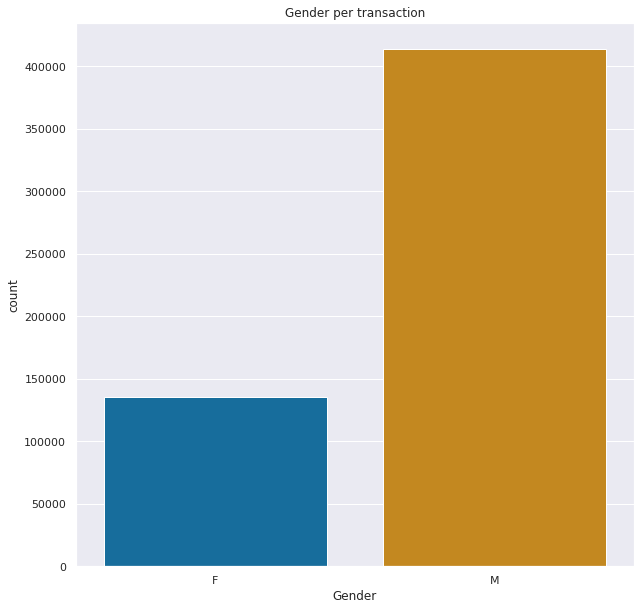

In [20]:
sns.countplot(x=train.Gender)
plt.title('Gender per transaction');

B) Age

In [21]:
ageData = sorted(list(zip(train.Age.value_counts().index, train.Age.value_counts().values)))
age, productBuy = zip(*ageData)
age, productBuy = list(age), list(productBuy)
ageSeries = pd.Series((i for i in age))

data = [go.Bar(x=age, 
               y=productBuy, 
               name="How many products were sold",
               marker = dict(color=['black', 'yellow', 'green', 'blue', 'red', 'gray', '#C4061D'],
                            line = dict(color='#7C7C7C', width = .5)),
              text="Age: " + ageSeries)]
layout = go.Layout(title= "How many products were sold by ages")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

C) the occupation of customers

In [23]:
palette=sns.color_palette("Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



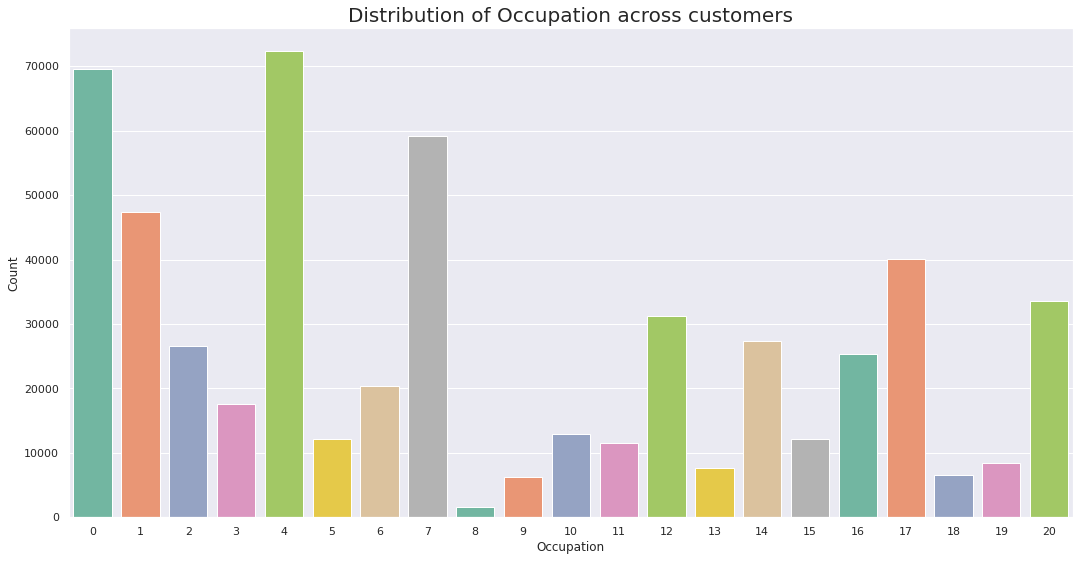

In [24]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(train['Occupation'], palette = palette)
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

Total Money Spent per Occupation

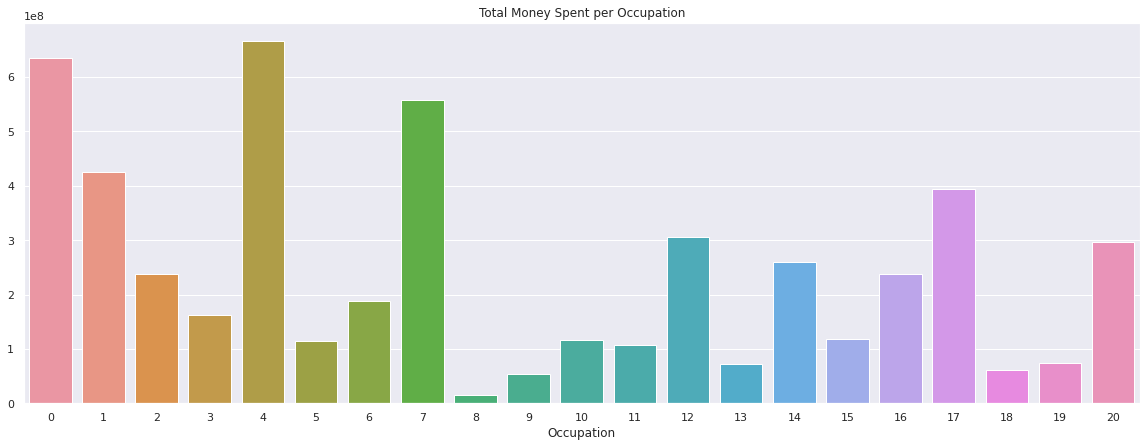

In [25]:
spent_by_occ = train.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 7))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

Once again, the distribution of the mean amount spent within each occupation appears to mirror the distribution of the amount of people within each occupation. This is fortunate from a data science perspective, as we are not working with odd or outstanding features. Our data, in terms of age and occupation seems to simply make sense.

d) City_Category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



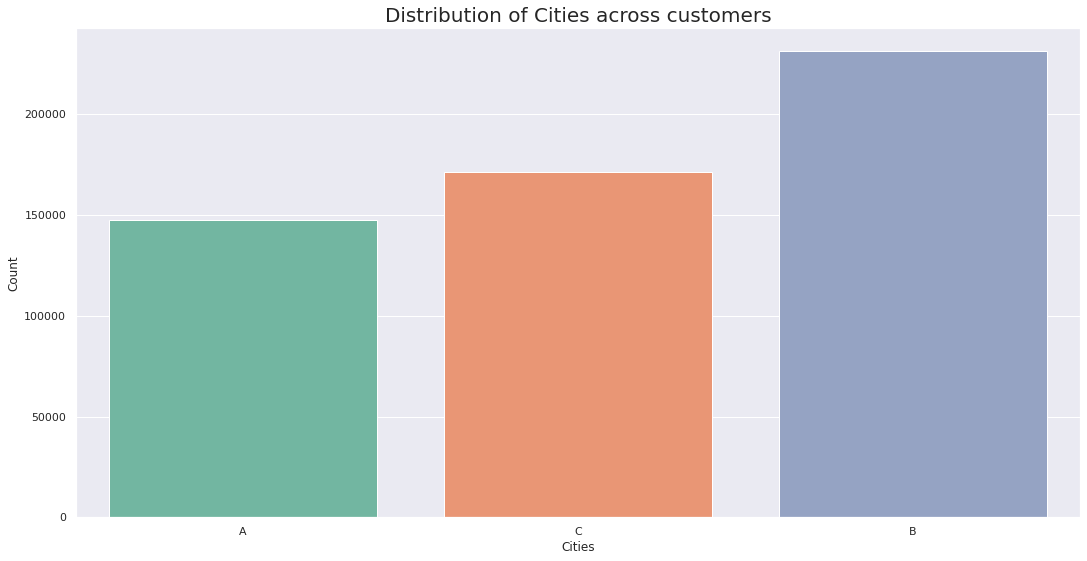

In [26]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(train['City_Category'], palette = palette)
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

E) Products

Here we explore the products themselves. This is important, as we do not have labeled items in this dataset. Theoretically, a customer could be spending $5,000 on 4 new TVs, or 10,000 pens. This difference matters for stores, as their profits are affected. Since we do not know what the items are, let's explore the categories of the items.

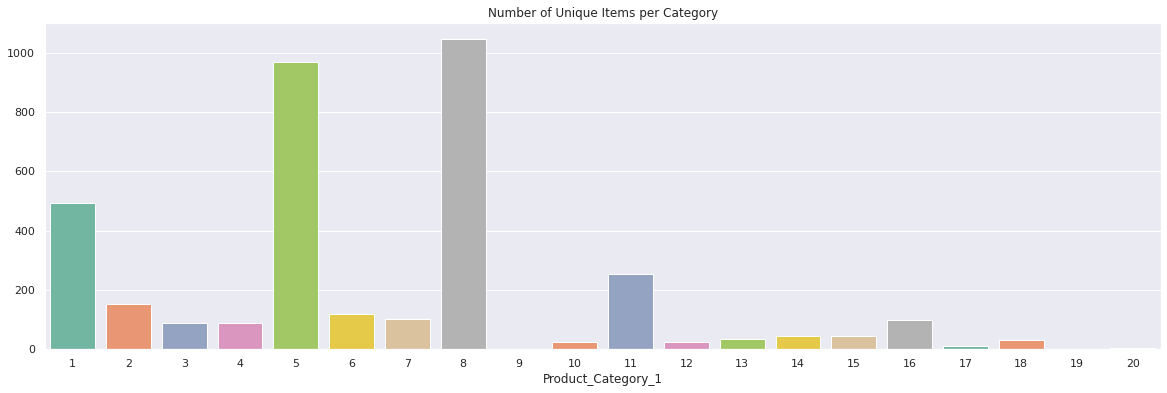

In [27]:
plt.figure(figsize=(20,6))
prod_by_cat = train.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette=palette)
plt.title('Number of Unique Items per Category')
plt.show()

Category labels 1, 5, and 8 clearly have the most items within them. This could mean the store is known for that item, or that the category is a broad one.

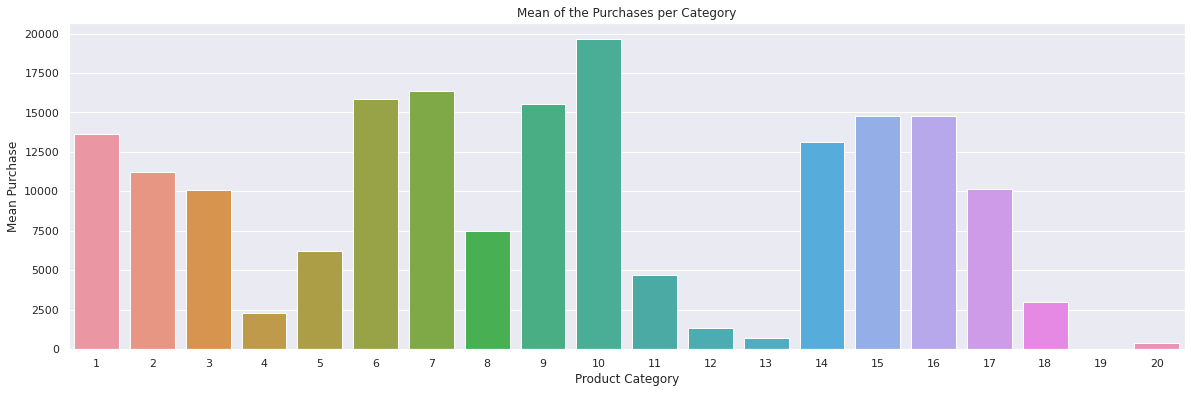

In [28]:
category = []
mean_purchase = []


for i in train['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(train[train['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(20,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



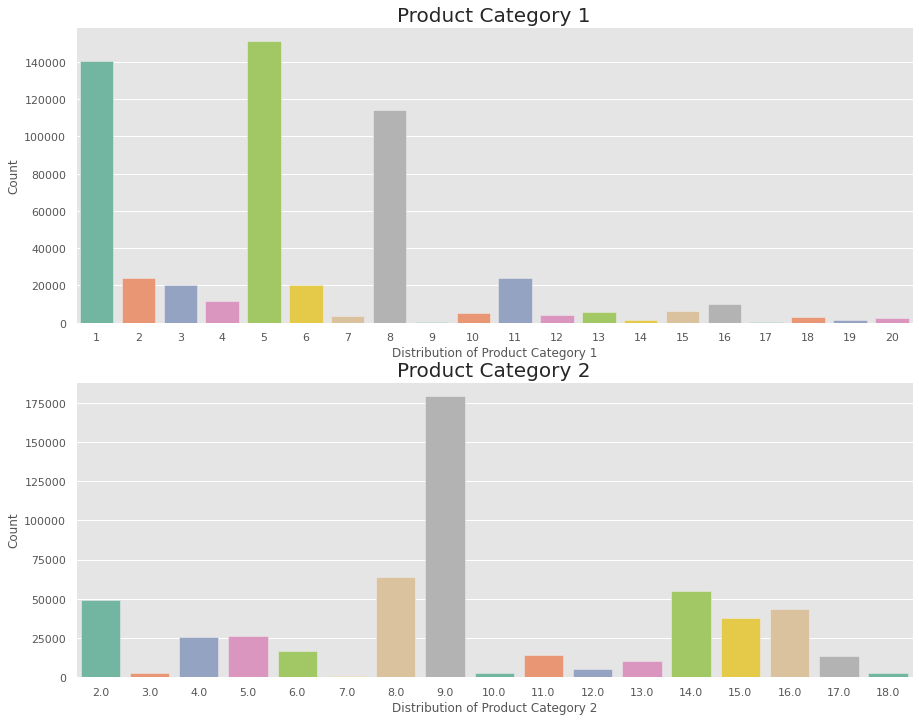

In [29]:
# visualizing the different product categories

plt.rcParams['figure.figsize'] = (15, 25)
plt.style.use('ggplot')

plt.subplot(4, 1, 1)
sns.countplot(train['Product_Category_1'], palette = palette)
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(4, 1, 2)
sns.countplot(train['Product_Category_2'], palette = palette)
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')


plt.show()

the purchase attribute which is our target variable

In [30]:
# importing important libraries
from scipy import stats
from scipy.stats import norm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


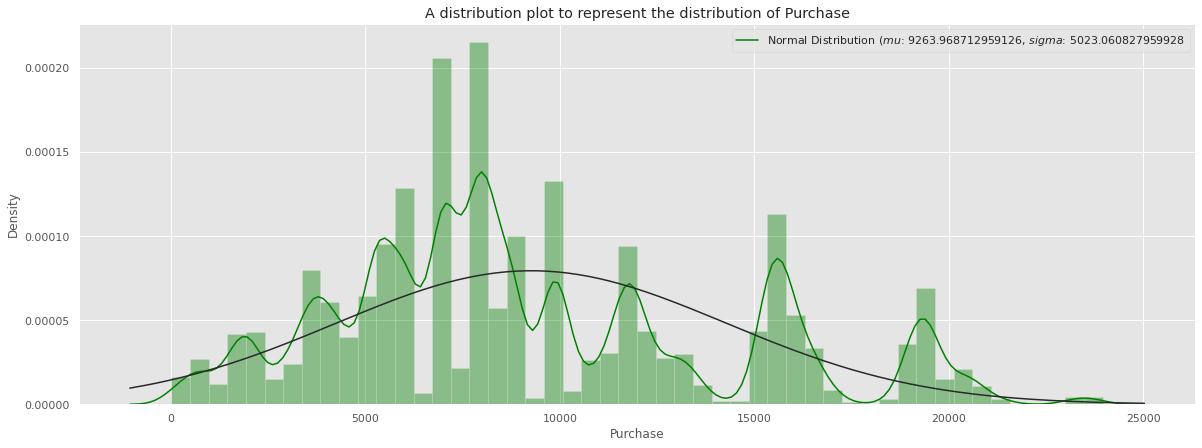

In [31]:
# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(train['Purchase'], color = 'green', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(train['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# **data selection**

first we gonna drop the :

1User_ID


2Product_ID

In [32]:
train = train.drop(['Product_ID','User_ID'],axis=1)

In [33]:
# checking the new shape of data
print(train.shape)
train

(550068, 9)


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.0,368
550064,F,26-35,1,C,3,0,20,9.0,371
550065,F,26-35,15,B,4+,1,20,9.0,137
550066,F,55+,1,C,2,0,20,9.0,365


label encoding

In [34]:
df_Gender = pd.get_dummies(train['Gender'])
df_Age = pd.get_dummies(train['Age'])
df_City_Category = pd.get_dummies(train['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(train['Stay_In_Current_City_Years'])

data_final= pd.concat([train, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.0,8370,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.0,15200,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.0,1422,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.0,1057,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.0,7969,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [35]:
data_final = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)
data_final

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C,0,1,2,3,4+
0,10,0,3,9.0,8370,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,15200,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,10,0,12,9.0,1422,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,1057,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,16,0,8,9.0,7969,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,9.0,368,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
550064,1,0,20,9.0,371,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
550065,15,1,20,9.0,137,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
550066,1,0,20,9.0,365,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [36]:
data_final.dtypes

Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
F                       uint8
M                       uint8
0-17                    uint8
18-25                   uint8
26-35                   uint8
36-45                   uint8
46-50                   uint8
51-55                   uint8
55+                     uint8
A                       uint8
B                       uint8
C                       uint8
0                       uint8
1                       uint8
2                       uint8
3                       uint8
4+                      uint8
dtype: object

 **Predicting the Amount Spent**


we will use one of the simplest machine learning models, i.e. the linear regression model, to predict the amount spent by the customer on Black Friday.

Linear regression represents a very simple method for supervised learning and it is an effective tool for predicting quantitative responses. You can find basic information about it right here: Linear Regression in Python

This model, like most of the supervised machine learning algorithms, makes a prediction based on the input features. The predicted output values are used for comparisons with desired outputs and an error is calculated. The error signal is propagated back through the model and model parameters are updating in a way to minimize the error. Finally, the model is considered to be fully trained if the error is small enough. This is a very basic explanation and we are going to analyze all these processes in details in future articles.

**split data**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [38]:
x=data_final.drop('Purchase',axis=1)
y=data_final.Purchase

In [39]:
print(x.shape)
print(y.shape)

(550068, 21)
(550068,)


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

1) LinearRegression

In [42]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [43]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 9269.861022754649
                     Coefficient
Occupation          4.962842e+01
Marital_Status     -5.865855e+01
Product_Category_1 -1.624923e+03
Product_Category_2 -2.647057e+02
F                  -8.969551e+15
M                  -8.969551e+15
0-17               -1.574426e+16
18-25              -3.704167e+16
26-35              -4.715053e+16
36-45              -3.853040e+16
46-50              -2.658511e+16
51-55              -2.452076e+16
55+                -1.861068e+16
A                   1.801715e+16
B                   2.004876e+16
C                   1.881509e+16
0                  -1.183323e+16
1                  -1.650784e+16
2                  -1.343666e+16
3                  -1.308523e+16
4+                 -1.248046e+16


In [45]:
predictions = lm.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [11611.86102275  8495.86102275 11457.86102275 ...  9125.86102275
  9318.80723369 10844.30525456]


In [46]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 3588.9589032878876
MSE: 21930926.545893617
